## <font color='blue'> Análise de Dados Enem - 2020</font>

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath(os.path.join('case')))
from funcoes import *


#### Visualizar todas colunas e linhas - Ignorar Avisos

In [2]:
#Ignorar Avisos e Maximizar o Dataset
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Carregando os Dados

In [3]:
#Lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

In [4]:
#Leitura do Arquivo
df = pd.read_csv(r"C:\Users\licid\Downloads\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.csv",delimiter=';',encoding='ISO-8859-1',na_values = lista_labels_valores_ausentes)

#### Analise Exploratória dos Dados

In [5]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.0,689.0,693.0,698.0,604.1,661.7,595.3,711.3,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,35.0,SP,3.0,1.0,1.0,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [6]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [7]:
df.shape

(5783109, 76)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

#### Percentual de Valores Ausentes

In [9]:
func_calc_percentual_valores_ausentes(df)

O dataset tem 25.47 % de valores ausentes.


In [10]:
tabela_de_valores_ausentes = func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 76 colunas.
Encontrado: 56 colunas que têm valores ausentes.


In [11]:
tabela_de_valores_ausentes

,Valores Ausentes,% de Valores Ausentes,Dtype
CO_MUNICIPIO_ESC,4878540,84.36,float64
NO_MUNICIPIO_ESC,4878540,84.36,object
CO_UF_ESC,4878540,84.36,float64
SG_UF_ESC,4878540,84.36,object
TP_LOCALIZACAO_ESC,4878540,84.36,float64
TP_DEPENDENCIA_ADM_ESC,4878540,84.36,float64
TP_SIT_FUNC_ESC,4878540,84.36,float64
TP_ENSINO,4479663,77.46,float64
CO_PROVA_CN,3185669,55.09,float64
CO_PROVA_MT,3185669,55.09,float64


Após realizar uma análise exploratória do dataset, percebi que há 56 colunas com valores ausentes, o que representa 25% do total de valores nulos no conjunto de dados. Algumas colunas mais de 50% de valores ausentes, mas acredito que seja importante mantê-las, pois, em muitos casos, os valores ausentes refletem alunos que não realizaram as provas.

Além disso, os dados relacionados à escola apresentam 80% de valores nulos. É uma Variavel Alvo

In [12]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.0,689.0,693.0,698.0,604.1,661.7,595.3,711.3,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,35.0,SP,3.0,1.0,1.0,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


#### Remoção de Colunas 

A Coluna 'TP_ENSINO' e 'TP_DEPENDENCIA_ADM_ESC' possuem valores ausentes. Mas eu vou optar por deixalas no dataset.

In [13]:
colunas_para_remover = tabela_de_valores_ausentes[tabela_de_valores_ausentes['% de Valores Ausentes'] >= 60.00].index.tolist()

In [14]:
colunas_para_remover

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_SIT_FUNC_ESC',
 'TP_ENSINO']

In [15]:
colunas_para_remover = [col for col in colunas_para_remover if col not in ['TP_ENSINO',
    'TP_DEPENDENCIA_ADM_ESC']]

In [16]:
colunas_para_remover

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC']

In [17]:
df_limpo = df.drop(colunas_para_remover, axis = 1)

In [18]:
func_calc_percentual_valores_ausentes_coluna(df_limpo)

O dataset tem 70 colunas.
Encontrado: 50 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
TP_DEPENDENCIA_ADM_ESC,4878540,84.36,float64
TP_ENSINO,4479663,77.46,float64
CO_PROVA_CN,3185669,55.09,float64
CO_PROVA_MT,3185669,55.09,float64
NU_NOTA_MT,3185669,55.09,float64
NU_NOTA_CN,3185669,55.09,float64
TX_GABARITO_CN,3185669,55.09,object
TX_GABARITO_MT,3185669,55.09,object
TX_RESPOSTAS_MT,3185669,55.09,object
TX_RESPOSTAS_CN,3185669,55.09,object


#### Colunas Importantes

In [19]:
# Colunas escolhidas
colunas_importantes = [
    'NU_INSCRICAO',
    'TP_ESTADO_CIVIL',
    'TP_NACIONALIDADE',  
    'TP_FAIXA_ETARIA',      
    'NU_ANO',             
    'TP_SEXO',             
    'TP_COR_RACA',         
    'TP_ESCOLA',           
    'NU_NOTA_CN',          
    'NU_NOTA_CH',          
    'NU_NOTA_LC',          
    'NU_NOTA_MT',          
    'TP_PRESENCA_CN',      
    'TP_PRESENCA_CH',      
    'TP_PRESENCA_LC',      
    'TP_PRESENCA_MT',      
    'TP_DEPENDENCIA_ADM_ESC', 
    'TP_STATUS_REDACAO',   
    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
    'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'  
]


In [20]:
dataset = df_limpo[colunas_importantes]

#### Análise das Varivaveis Null

In [21]:
dataset.isnull().sum()

NU_INSCRICAO                    0
TP_ESTADO_CIVIL                 0
TP_NACIONALIDADE                0
TP_FAIXA_ETARIA                 0
NU_ANO                          0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ESCOLA                       0
NU_NOTA_CN                3185669
NU_NOTA_CH                3028969
NU_NOTA_LC                3028969
NU_NOTA_MT                3185669
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
TP_DEPENDENCIA_ADM_ESC    4878540
TP_STATUS_REDACAO         3028969
Q001                        95966
Q002                        95966
Q003                        95966
Q004                        95966
Q005                        95966
Q006                        95966
Q007                        95966
Q008                        95966
Q009                        95966
Q010                        95966
Q011                        95966
Q012          

As Variaveis (NOTA) é a alvo. Não é aconselhavel fazer imputação de valores nesta variavel!

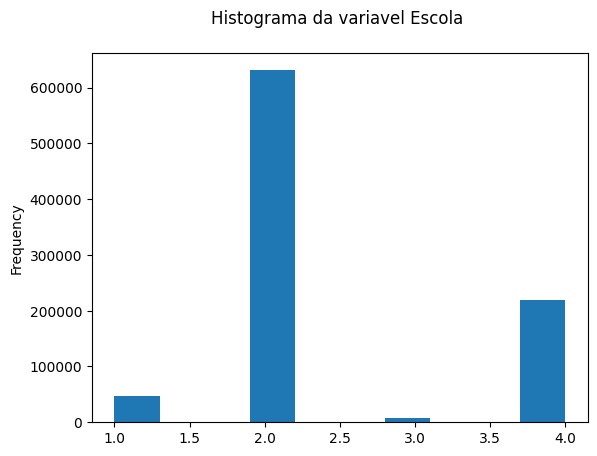

In [22]:
#Histograma
dataset.TP_DEPENDENCIA_ADM_ESC.plot( kind= "hist")
plt.title ("Histograma da variavel Escola \n ")
plt.show()

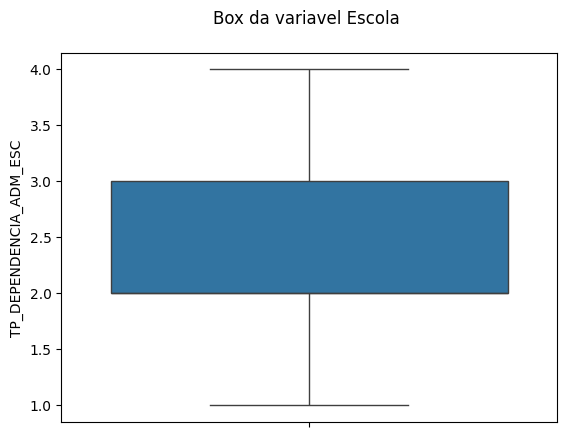

In [23]:
#boxplot
sns.boxplot(dataset.TP_DEPENDENCIA_ADM_ESC)
plt.title("Box da variavel Escola \n ")
plt.show()

Usei o boxplot e o histograma para visualizar a distribuição e caracteristicas da Variavel Escola.

In [24]:
dataset.TP_DEPENDENCIA_ADM_ESC.isnull().sum()

np.int64(4878540)

In [25]:
#percentual de valores ausentes
dataset.TP_DEPENDENCIA_ADM_ESC.isnull().mean()*100

np.float64(84.35843073336504)

In [26]:
dataset.TP_DEPENDENCIA_ADM_ESC.median()

np.float64(2.0)

In [27]:
dataset.TP_DEPENDENCIA_ADM_ESC.mean()

np.float64(2.4412565542263773)

In [28]:
dataset.TP_DEPENDENCIA_ADM_ESC.mode()

0    2.0
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64

Os dados parecem mais assimetricos, além disso a moda está muito abaixo da média. Desta forma usei "Unknown" para imputação.

In [29]:
dataset.TP_DEPENDENCIA_ADM_ESC.fillna("Unknown", inplace = True)

### Redação

In [30]:
dataset.TP_STATUS_REDACAO.isnull().mean()*100            

np.float64(52.37613539706756)

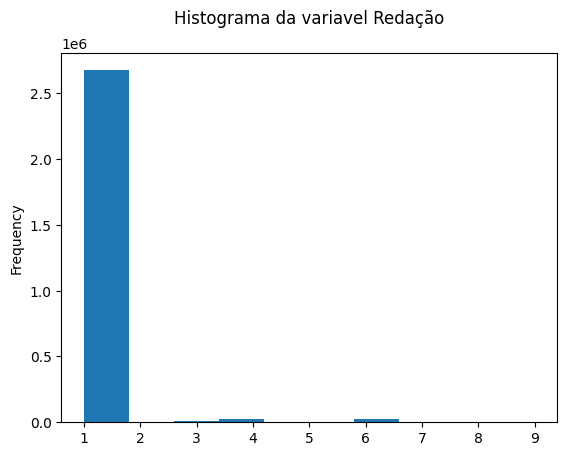

In [31]:
#Histograma
dataset.TP_STATUS_REDACAO.plot( kind= "hist")
plt.title ("Histograma da variavel Redação\n ")
plt.show()

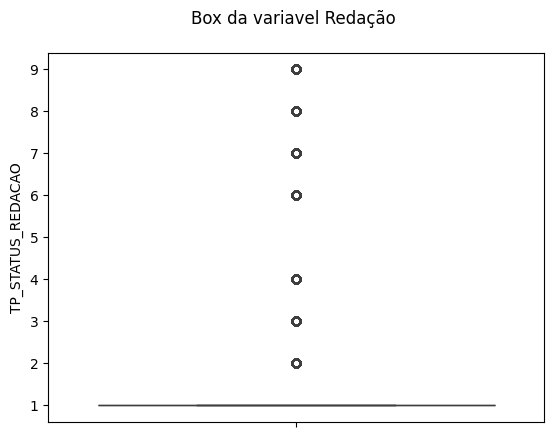

In [32]:
#boxplot
sns.boxplot(dataset.TP_STATUS_REDACAO)
plt.title("Box da variavel Redação \n ")
plt.show()

Notei que a variável "redação" apresenta 50% de valores nulos e também contém outliers. Portanto, vou aplicar a função de tratamento de outliers para essa variável, bem como para as demais. Acredito que outras variáveis também possam estar enviesadas e gerar dados incorretos.

Vou selecionar todas as variáveis do tipo float e int e tratar os outliers nelas

In [33]:
#Class Outliers
trata_outlier = TrataOutlier(dataset)

In [34]:
list_col = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [35]:
list_col

['NU_INSCRICAO',
 'TP_ESTADO_CIVIL',
 'TP_NACIONALIDADE',
 'TP_FAIXA_ETARIA',
 'NU_ANO',
 'TP_COR_RACA',
 'TP_ESCOLA',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_STATUS_REDACAO',
 'Q005']

In [36]:
# Visão geral dos outliers
trata_outlier.getOverview(list_col)

Nome de Coluna,TP_ESCOLA,TP_ESTADO_CIVIL,Q005,TP_NACIONALIDADE,TP_STATUS_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_INSCRICAO,TP_COR_RACA,TP_FAIXA_ETARIA,NU_ANO,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_MT,TP_PRESENCA_LC
Min,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,200001014230.0,0.0,1.0,2020.0,0.0,0.0,0.0,0.0
Q1,1.0,1.0,3.0,1.0,1.0,478.0,425.8,435.3,427.0,200002470640.0,1.0,3.0,2020.0,0.0,0.0,0.0,0.0
Median,1.0,1.0,4.0,1.0,1.0,529.9,505.1,512.5,483.7,200003926949.0,2.0,5.0,2020.0,0.0,0.0,0.0,0.0
Q3,1.0,1.0,4.0,1.0,1.0,576.4,602.3,580.6,548.7,200005383301.0,3.0,11.0,2020.0,1.0,1.0,1.0,1.0
Max,3.0,4.0,20.0,4.0,9.0,801.1,975.0,862.6,854.8,200007078230.0,5.0,20.0,2020.0,2.0,2.0,2.0,2.0
IQR,0.0,0.0,1.0,0.0,0.0,98.4,176.5,145.3,121.7,2912661.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0
Lower fence,1.0,1.0,1.5,1.0,1.0,330.4,161.05,217.35,244.45,199998101648.5,-2.0,-9.0,2020.0,-1.5,-1.5,-1.5,-1.5
Upper fence,1.0,1.0,5.5,1.0,1.0,724.0,867.05,798.55,731.25,200009752292.5,6.0,23.0,2020.0,2.5,2.5,2.5,2.5
Skew,1.719999,1.794647,1.04995,8.206992,7.247425,-0.608048,0.538226,-0.090514,0.303225,-0.00002,-0.133762,0.573414,0.0,0.107137,0.208478,0.208478,0.107137
Num_Outliers,1395827,931799,766467,158487,79226,18408,11895,6075,5687,0,0,0,0,0,0,0,0


In [37]:
# Replace dos outliers
trata_outlier.replace_outliers_with_fences(list_col)

In [38]:
trata_outlier.getOverview(list_col)

Nome de Coluna,NU_INSCRICAO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_FAIXA_ETARIA,NU_ANO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO,Q005
Min,200001014230.0,1.0,1.0,1.0,2020.0,0.0,1.0,244.45,217.35,330.4,161.05,0.0,0.0,0.0,0.0,1.0,1.5
Q1,200002470640.0,1.0,1.0,3.0,2020.0,1.0,1.0,427.0,435.3,478.0,425.8,0.0,0.0,0.0,0.0,1.0,3.0
Median,200003926949.0,1.0,1.0,5.0,2020.0,2.0,1.0,483.7,512.5,529.9,505.1,0.0,0.0,0.0,0.0,1.0,4.0
Q3,200005383301.0,1.0,1.0,11.0,2020.0,3.0,1.0,548.7,580.6,576.4,602.3,1.0,1.0,1.0,1.0,1.0,4.0
Max,200007078230.0,1.0,1.0,20.0,2020.0,5.0,1.0,731.25,798.55,724.0,867.05,2.0,2.0,2.0,2.0,1.0,5.5
IQR,2912661.0,0.0,0.0,8.0,0.0,2.0,0.0,121.7,145.3,98.4,176.5,1.0,1.0,1.0,1.0,0.0,1.0
Lower fence,199998101648.5,1.0,1.0,-9.0,2020.0,-2.0,1.0,244.45,217.35,330.4,161.05,-1.5,-1.5,-1.5,-1.5,1.0,1.5
Upper fence,200009752292.5,1.0,1.0,23.0,2020.0,6.0,1.0,731.25,798.55,724.0,867.05,2.5,2.5,2.5,2.5,1.0,5.5
Skew,-0.00002,0.0,0.0,0.573414,0.0,-0.133762,0.0,0.346937,0.125545,-0.346223,0.532362,0.208478,0.107137,0.107137,0.208478,0.0,-0.050682
Num_Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Após aplicar a função, percebi que algumas variáveis, como "TP NACIONALIDADE" e "ESTADO CIVIL", perderam alguns valores. Mesmo assim, vou continuar a análise dessa forma. Se no final a analise não fazer sentido eu volto.

#### Substituição das variáveis pelos valores do dicionário.

1 - Faixa Etaria

In [39]:
dataset['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
3.0     887715
2.0     775404
4.0     609450
11.0    575442
5.0     459606
6.0     353734
12.0    341808
1.0     336805
7.0     274709
8.0     239812
13.0    235027
9.0     204689
10.0    177344
14.0    143795
15.0     86079
16.0     47539
17.0     22383
18.0      8144
19.0      2693
20.0       931
Name: count, dtype: int64

In [40]:
dataset['TP_FAIXA_ETARIA'] = dataset['TP_FAIXA_ETARIA'].astype('object')

# Dicionário de faixas etárias
faixa_etaria_dicionario = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

# Substituição
dataset.loc[:, 'TP_FAIXA_ETARIA'] = dataset['TP_FAIXA_ETARIA'].map(faixa_etaria_dicionario)


In [41]:
dataset['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
18 anos               887715
17 anos               775404
19 anos               609450
Entre 26 e 30 anos    575442
20 anos               459606
21 anos               353734
Entre 31 e 35 anos    341808
Menor de 17 anos      336805
22 anos               274709
23 anos               239812
Entre 36 e 40 anos    235027
24 anos               204689
25 anos               177344
Entre 41 e 45 anos    143795
Entre 46 e 50 anos     86079
Entre 51 e 55 anos     47539
Entre 56 e 60 anos     22383
Entre 61 e 65 anos      8144
Entre 66 e 70 anos      2693
Maior de 70 anos         931
Name: count, dtype: int64

2 - RAÇA

In [42]:
dataset['TP_COR_RACA'].value_counts()

TP_COR_RACA
3.0    2720485
1.0    2007633
2.0     771740
4.0     128522
0.0     116883
5.0      37846
Name: count, dtype: int64

In [43]:
# Dicionário para mapeamento da variável TP_COR_RACA
cor_raca_dicionario = {
    0: 'unknown',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

dataset.loc[:, 'TP_COR_RACA'] = dataset['TP_COR_RACA'].map(cor_raca_dicionario)

3 - Tipo Escola

In [44]:
dataset['TP_ESCOLA'] = dataset['TP_ESCOLA'].astype('object')

escola_dicionario = {
    1: 'Unknown',
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior'
}

dataset.loc[:, 'TP_ESCOLA'] = dataset['TP_ESCOLA'].map(escola_dicionario)

4 - Presença nas Provas

In [45]:
# Dicionário de imputação para as colunas de presença nas provas
presenca_dicionario = {
    0: 'Não',
    1: 'Sim',
    2: 'Outro'
}

# Imputação das colunas TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT
dataset['TP_PRESENCA_CN'] = dataset['TP_PRESENCA_CN'].map(presenca_dicionario)
dataset['TP_PRESENCA_CH'] = dataset['TP_PRESENCA_CH'].map(presenca_dicionario)
dataset['TP_PRESENCA_LC'] = dataset['TP_PRESENCA_LC'].map(presenca_dicionario)
dataset['TP_PRESENCA_MT'] = dataset['TP_PRESENCA_MT'].map(presenca_dicionario)


5 - Escola

In [46]:
# Dicionário de imputação para a coluna TP_DEPENDENCIA_ADM_ESC
dependencia_dicionario = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

# Imputação da coluna TP_DEPENDENCIA_ADM_ESC
dataset['TP_DEPENDENCIA_ADM_ESC'] = dataset['TP_DEPENDENCIA_ADM_ESC'].map(dependencia_dicionario)


6 - Nacionalidade

In [47]:
nacionalidade_dicionario = {
    0: 'Unknown',
    1: 'Cidadão(ã) Brasileiro(a)',
    2: 'Cidadão(ã) Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) de Origem, nascido(a) no exterior'
}

# Imputação da coluna TP_DEPENDENCIA_ADM_ESC
dataset['TP_NACIONALIDADE'] = dataset['TP_NACIONALIDADE'].map(nacionalidade_dicionario)

7 - Redação

In [48]:
# Dicionário de imputação para a coluna TP_STATUS_REDACAO
status_redacao_dicionario = {
    1: 'Sem problemas',
    2: 'Anulada',
    3: 'Cópia Texto Motivador',
    4: 'Em Branco',
    6: 'Fuga ao tema',
    7: 'Não atendimento ao tipo textual',
    8: 'Texto insuficiente',
    9: 'Parte desconectada'
}

# Imputação da coluna TP_STATUS_REDACAO
dataset['TP_STATUS_REDACAO'] = dataset['TP_STATUS_REDACAO'].map(status_redacao_dicionario)


8 - Estado Civil

In [49]:
# Dicionário de imputação para a coluna TP_STATUS_REDACAO
estado_civil_dicionario = {
    0: 'Unknown',
    1: 'Solteiro(a)',
    2: 'Casado(a) ou Mora com companheiro(a)',
    3: 'Divorciado(a), Desquitado(a) ou Separado(a)',
    4: 'Viúvo(a)'
}

# Imputação da coluna TP_STATUS_REDACAO
dataset['TP_ESTADO_CIVIL'] = dataset['TP_ESTADO_CIVIL'].map(estado_civil_dicionario)

9 - Variáveis socioeconômicas

In [50]:
q001_mapping = {
    'A': 'Nunca estudou',
    'B': 'Não completou o Ensino Fundamental',
    'C': 'Até o 5º ano',
    'D': 'Ensino Fundamental',
    'E': 'Ensino Médio',
    'F': 'Faculdade',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}

q002_mapping = {
    'A': 'Nunca estudou',
    'B': 'Não completou o Ensino Fundamental',
    'C': 'Até o 5º ano',
    'D': 'Ensino Fundamental',
    'E': 'Ensino Médio',
    'F': 'Faculdade',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}


q005_mapping = {
    1: '1, pois moro sozinho(a)', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 
    10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 
    19: '19', 20: '20'
}

q006_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1045.00',
    'C': 'De R$ 1045.01 até R$ 1567.50',
    'D': 'De R$ 1567.51 até R$ 2090.00',
    'E': 'De R$ 2090.01 até R$ 2612.50',
    'F': 'De R$ 2612.51 até R$ 3135.00',
    'G': 'De R$ 3135.01 até R$ 4180.00',
    'H': 'De R$ 4180.01 até R$ 5225.00',
    'I': 'De R$ 5225.01 até R$ 6270.00',
    'J': 'De R$ 6270.01 até R$ 7315.00',
    'K': 'De R$ 7315.01 até R$ 8360.00',
    'L': 'De R$ 8360.01 até R$ 9405.00',
    'M': 'De R$ 9405.01 até R$ 10450.00',
    'N': 'De R$ 10450.01 até R$ 12540.00',
    'O': 'De R$ 12540.01 até R$ 15675.00',
    'P': 'De R$ 15675.01 até R$ 20900.00',
    'Q': 'Acima de R$ 20900.00'
}

q025_mapping = {
    'A':'Não',
    'B':'Sim'
}


# Aplicar os mapeamentos
dataset['Q001'] = dataset['Q001'].map(q001_mapping)
dataset['Q002'] = dataset['Q002'].map(q002_mapping)
dataset['Q005'] = dataset['Q005'].map(q005_mapping)
dataset['Q006'] = dataset['Q006'].map(q006_mapping)
dataset['Q025'] = dataset['Q025'].map(q025_mapping)

#### Alterar o nome de algumas colunas

In [51]:
# Dicionário para renomear as colunas
colunas_renomeadas = {
    'NU_INSCRICAO': 'COD_INSCRICAO',
    'TP_FAIXA_ETARIA': 'FAIXA_ETARIA',
    'TP_ESTADO_CIVIL': 'ESTADO_CIVIL',
    'TP_NACIONALIDADE':'NACIONALIDADE',
    'NU_ANO': 'ANO',
    'TP_SEXO': 'SEXO',
    'TP_COR_RACA': 'RACA',
    'TP_ESCOLA': 'TIPO_ESCOLA',
    'NU_NOTA_CN':'NOTA_CIENCIA_NATUREZA',
    'NU_NOTA_CH':'NOTA_CIENCIA_HUMANA',
    'NU_NOTA_LC':'NOTA_LINGUAGEM_CODIGO',
    'NU_NOTA_MT':'NOTA_MATEMATICA',
    'TP_PRESENCA_CN':'PRESENCA_CN',
    'TP_PRESENCA_CH':'PRESENCA_CH',
    'TP_PRESENCA_LC':'PRESENCA_LC',
    'TP_PRESENCA_MT':'PRESENCA_MT',
    'TP_DEPENDENCIA_ADM_ESC':'ESCOLA',
    'TP_STATUS_REDACAO':'REDACAO'
}

# Renomeando as colunas do DataFrame
dataset = dataset.rename(columns=colunas_renomeadas)


In [52]:
dataset.head()

,COD_INSCRICAO,ESTADO_CIVIL,NACIONALIDADE,FAIXA_ETARIA,ANO,SEXO,RACA,TIPO_ESCOLA,NOTA_CIENCIA_NATUREZA,NOTA_CIENCIA_HUMANA,NOTA_LINGUAGEM_CODIGO,NOTA_MATEMATICA,PRESENCA_CN,PRESENCA_CH,PRESENCA_LC,PRESENCA_MT,ESCOLA,REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,2.000063e+11,Solteiro(a),Cidadão(ã) Brasileiro(a),Entre 26 e 30 anos,2020.0,F,Preta,Unknown,NaN,NaN,NaN,NaN,Não,Não,Não,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.000012e+11,Solteiro(a),Cidadão(ã) Brasileiro(a),Entre 26 e 30 anos,2020.0,M,Parda,Unknown,604.1,661.7,595.3,711.3,Sim,Sim,Sim,Sim,NaN,Sem problemas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000019e+11,Solteiro(a),Cidadão(ã) Brasileiro(a),19 anos,2020.0,F,Parda,Unknown,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Estadual,NaN,Não completou o Ensino Fundamental,Até o 5º ano,A,D,3,Até R$ 1045.00,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,Não
3,2.000019e+11,Solteiro(a),Cidadão(ã) Brasileiro(a),17 anos,2020.0,M,Parda,Unknown,620.8,675.0,624.2,759.4,Sim,Sim,Sim,Sim,Municipal,Sem problemas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000016e+11,Solteiro(a),Cidadão(ã) Brasileiro(a),19 anos,2020.0,F,Parda,Unknown,NaN,NaN,NaN,NaN,Não,Não,Não,Não,NaN,NaN,Não completou o Ensino Fundamental,Pós-graduação,B,B,3,Até R$ 1045.00,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,Sim


In [53]:
# Somando as colunas das notas
dataset['SOMA_NOTAS'] = dataset[['NOTA_CIENCIA_NATUREZA', 
                                    'NOTA_CIENCIA_HUMANA', 
                                    'NOTA_LINGUAGEM_CODIGO', 
                                    'NOTA_MATEMATICA'
                                    ]].sum(axis=1)


#### Conversão de Tipos de Dados

In [54]:
dataset.dtypes

COD_INSCRICAO            float64
ESTADO_CIVIL              object
NACIONALIDADE             object
FAIXA_ETARIA              object
ANO                      float64
SEXO                      object
RACA                      object
TIPO_ESCOLA               object
NOTA_CIENCIA_NATUREZA    float64
NOTA_CIENCIA_HUMANA      float64
NOTA_LINGUAGEM_CODIGO    float64
NOTA_MATEMATICA          float64
PRESENCA_CN               object
PRESENCA_CH               object
PRESENCA_LC               object
PRESENCA_MT               object
ESCOLA                    object
REDACAO                   object
Q001                      object
Q002                      object
Q003                      object
Q004                      object
Q005                      object
Q006                      object
Q007                      object
Q008                      object
Q009                      object
Q010                      object
Q011                      object
Q012                      object
Q013      

In [55]:
strig_columns = dataset.select_dtypes(include= 'object').columns.tolist()
strig_columns

['ESTADO_CIVIL',
 'NACIONALIDADE',
 'FAIXA_ETARIA',
 'SEXO',
 'RACA',
 'TIPO_ESCOLA',
 'PRESENCA_CN',
 'PRESENCA_CH',
 'PRESENCA_LC',
 'PRESENCA_MT',
 'ESCOLA',
 'REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']

In [56]:
convert_to_string(dataset,strig_columns)

#### Registros duplicados removidos e preenchimento com "Unknown"

In [57]:
dataset.drop_duplicates(inplace=True)

In [58]:
colunas_objeto = dataset.select_dtypes(include=['object','string']).columns

In [59]:
colunas_objeto

Index(['ESTADO_CIVIL', 'NACIONALIDADE', 'FAIXA_ETARIA', 'SEXO', 'RACA',
       'TIPO_ESCOLA', 'PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC',
       'PRESENCA_MT', 'ESCOLA', 'REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],
      dtype='object')

In [60]:
dataset[colunas_objeto] = dataset[colunas_objeto].fillna("Unknown")

## Análise Descritiva

#### 1- Qual a escola com a maior média de notas?

In [61]:
dataset['MEDIA_NOTAS'] = dataset[['NOTA_CIENCIA_NATUREZA', 'NOTA_CIENCIA_HUMANA', 'NOTA_LINGUAGEM_CODIGO', 'NOTA_MATEMATICA']].mean(axis=1)

In [62]:
# Calcular a média das notas por escola
media_por_escola = dataset.groupby('ESCOLA')['MEDIA_NOTAS'].mean()
escola_com_maior_media = media_por_escola.idxmax()
maior_media = media_por_escola.max()

print(f"A escola com a maior média de notas é: {escola_com_maior_media} com a média de {maior_media:.2f}")

A escola com a maior média de notas é: Privada com a média de 575.01


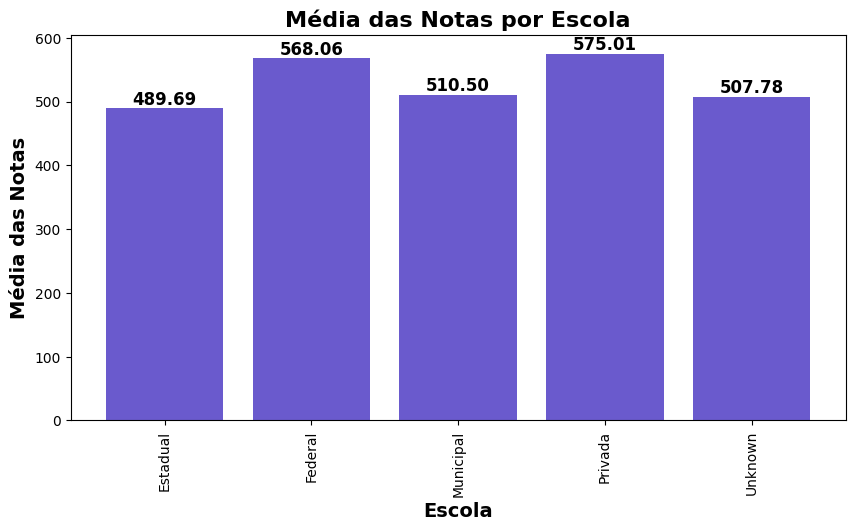

In [63]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(media_por_escola.index, media_por_escola.values, color='slateblue')

plt.xlabel('Escola', fontsize=14, fontweight='bold')
plt.ylabel('Média das Notas', fontsize=14, fontweight='bold')
plt.title('Média das Notas por Escola', fontsize=16, fontweight='bold')

plt.xticks(rotation=90) 

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

#### 2 - Qual o aluno com a maior média de notas e o valor dessa média?

In [64]:
aluno_com_maior_media = dataset.loc[dataset['MEDIA_NOTAS'].idxmax()]

nome_aluno = aluno_com_maior_media['COD_INSCRICAO'] 
maior_media = aluno_com_maior_media['MEDIA_NOTAS']

print(f"O aluno com a maior média é o de inscrição {nome_aluno} com a média de {maior_media:.2f}")

O aluno com a maior média é o de inscrição 200002831452.0 com a média de 799.15


#### 3 - Qual a média geral?

In [65]:
# Calcular a média geral das médias dos alunos
media_geral = dataset['MEDIA_NOTAS'].mean()

print(f"A média geral das notas é: {media_geral:.2f}")

A média geral das notas é: 510.79


#### 4 - Qual o % de Ausentes?

In [66]:
ausentes = dataset[['PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC', 'PRESENCA_MT']].eq('Não').any(axis=1)

percentual_ausentes = ausentes.sum() / len(df) * 100

print(f"O percentual de ausentes é: {percentual_ausentes:.2f}%")

O percentual de ausentes é: 55.21%


#### 5 - Qual o número total de Inscritos?

In [67]:
numero_total_inscritos = dataset['COD_INSCRICAO'].nunique()

print(f"O número total de inscritos é: {numero_total_inscritos}")

O número total de inscritos é: 5783109


#### 6 - Qual a média por disciplina?

In [68]:
disciplinas = ['NOTA_CIENCIA_NATUREZA', 'NOTA_CIENCIA_HUMANA', 'NOTA_LINGUAGEM_CODIGO', 'NOTA_MATEMATICA']
media_por_disciplina = dataset[disciplinas].mean()

print("Média por disciplina:")
print(media_por_disciplina)


Média por disciplina:
NOTA_CIENCIA_NATUREZA    490.436926
NOTA_CIENCIA_HUMANA      511.545224
NOTA_LINGUAGEM_CODIGO    524.132709
NOTA_MATEMATICA          520.490173
dtype: float64


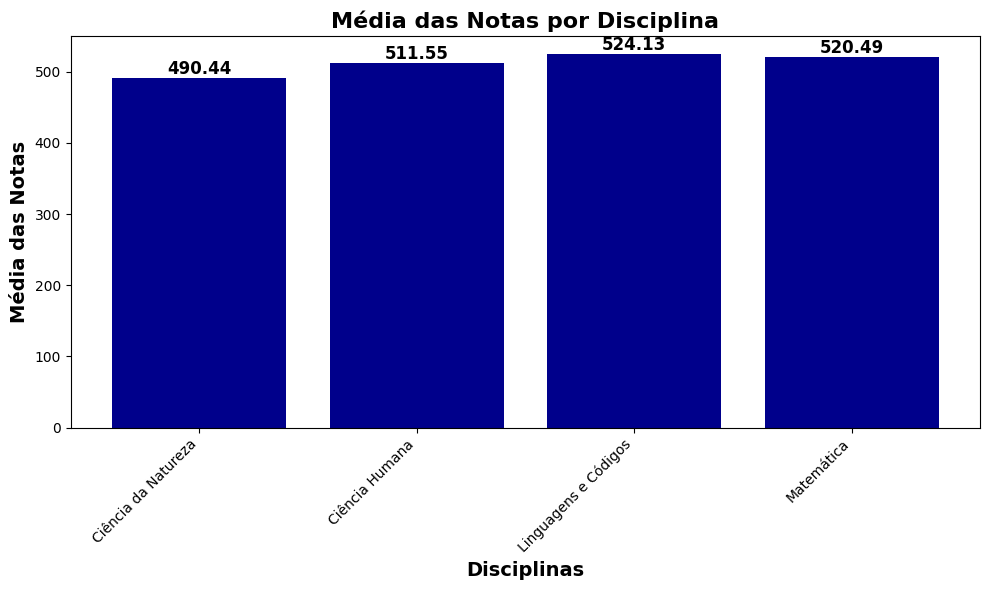

In [69]:
nomes_das_disciplinas = ['Ciência da Natureza', 'Ciência Humana', 'Linguagens e Códigos', 'Matemática']

plt.figure(figsize=(10, 6))
plt.bar(media_por_disciplina.index, media_por_disciplina.values, color='darkblue') 


plt.xticks(ticks=range(len(nomes_das_disciplinas)), labels=nomes_das_disciplinas, rotation=45, ha='right')

plt.xlabel('Disciplinas', fontsize=14, fontweight='bold')
plt.ylabel('Média das Notas', fontsize=14, fontweight='bold')
plt.title('Média das Notas por Disciplina', fontsize=16, fontweight='bold')

for i, value in enumerate(media_por_disciplina.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.tight_layout()  
plt.show()


#### 7 - Qual a média por Sexo?

In [70]:
media_por_sexo = dataset.groupby('SEXO')['MEDIA_NOTAS'].mean()

print("Média das Notas por Sexo:")
print(media_por_sexo)


Média das Notas por Sexo:
SEXO
F    501.046944
M    525.633566
Name: MEDIA_NOTAS, dtype: float64


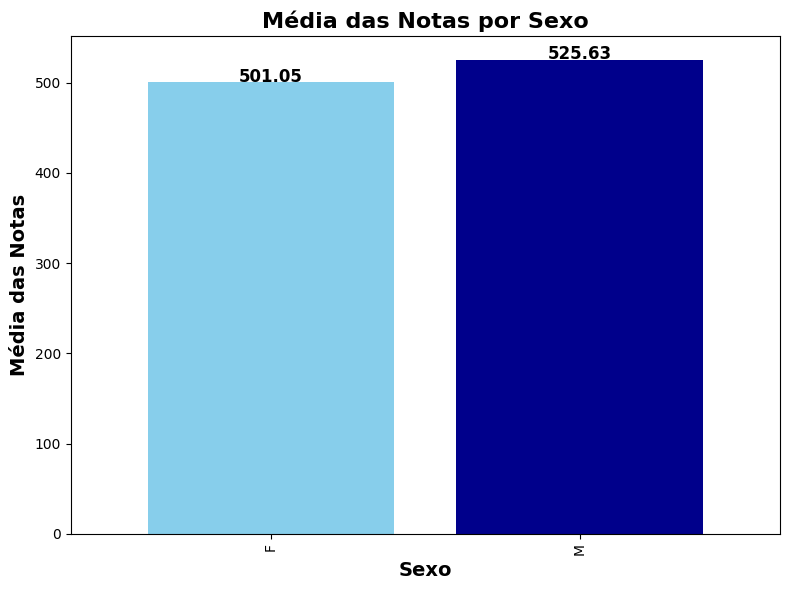

In [71]:
plt.figure(figsize=(8, 6))

media_por_sexo.plot(kind='bar', color=['skyblue', 'darkblue'], width=0.8)

plt.xlabel('Sexo', fontsize=14, fontweight='bold')
plt.ylabel('Média das Notas', fontsize=14, fontweight='bold')
plt.title('Média das Notas por Sexo', fontsize=16, fontweight='bold')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05, f'{p.get_height():.2f}',
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 8 - Qual a média por Etnia?

In [72]:
media_por_etnia = dataset.groupby('RACA')['MEDIA_NOTAS'].mean()

print("Média das Notas por Etnia:")
print(media_por_etnia)

Média das Notas por Etnia:
RACA
Amarela     508.784137
Branca      537.492427
Indígena    466.250507
Parda       494.603325
Preta       489.199431
unknown     519.122551
Name: MEDIA_NOTAS, dtype: float64


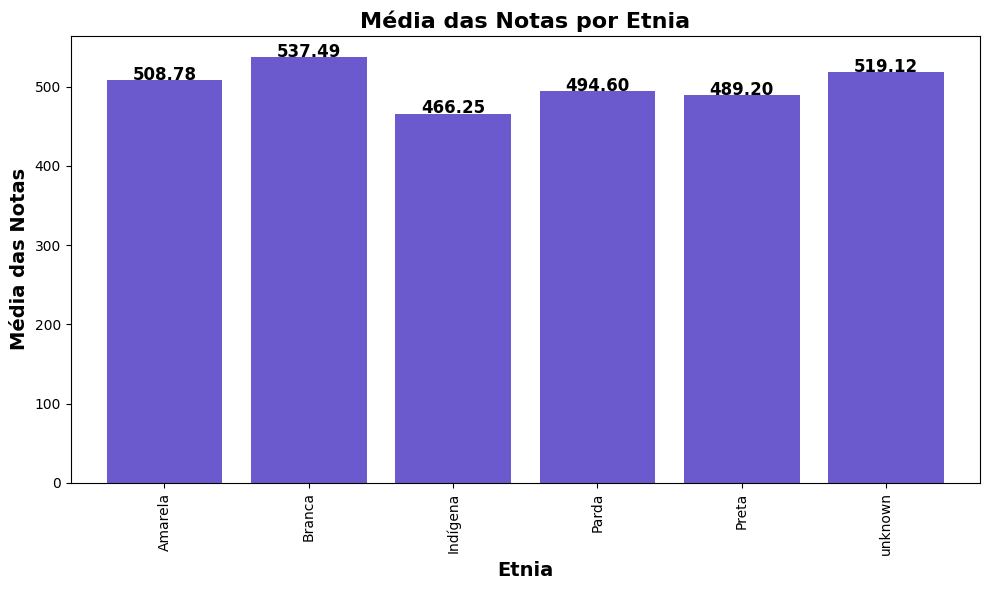

In [73]:
plt.figure(figsize=(10, 6))

media_por_etnia.plot(kind='bar', color='slateblue', width=0.8)

plt.xlabel('Etnia', fontsize=14, fontweight='bold')
plt.ylabel('Média das Notas', fontsize=14, fontweight='bold')
plt.title('Média das Notas por Etnia', fontsize=16, fontweight='bold')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05, f'{p.get_height():.2f}',
             ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()

plt.show()

### 9 - Qual a média por Faixa Etaria?

In [74]:
media_por_faixa_etaria = dataset.groupby('FAIXA_ETARIA')['MEDIA_NOTAS'].mean()

print("Média das Notas por Faixa Etária:")
print(media_por_faixa_etaria)

Média das Notas por Faixa Etária:
FAIXA_ETARIA
17 anos               520.198630
18 anos               513.412885
19 anos               510.216106
20 anos               508.965202
21 anos               507.482838
22 anos               506.818930
23 anos               506.080452
24 anos               504.287362
25 anos               504.358801
Entre 26 e 30 anos    505.779215
Entre 31 e 35 anos    503.067385
Entre 36 e 40 anos    493.701982
Entre 41 e 45 anos    484.611856
Entre 46 e 50 anos    483.068653
Entre 51 e 55 anos    480.879382
Entre 56 e 60 anos    479.621844
Entre 61 e 65 anos    469.585700
Entre 66 e 70 anos    454.329354
Maior de 70 anos      457.877508
Menor de 17 anos      519.253643
Name: MEDIA_NOTAS, dtype: float64


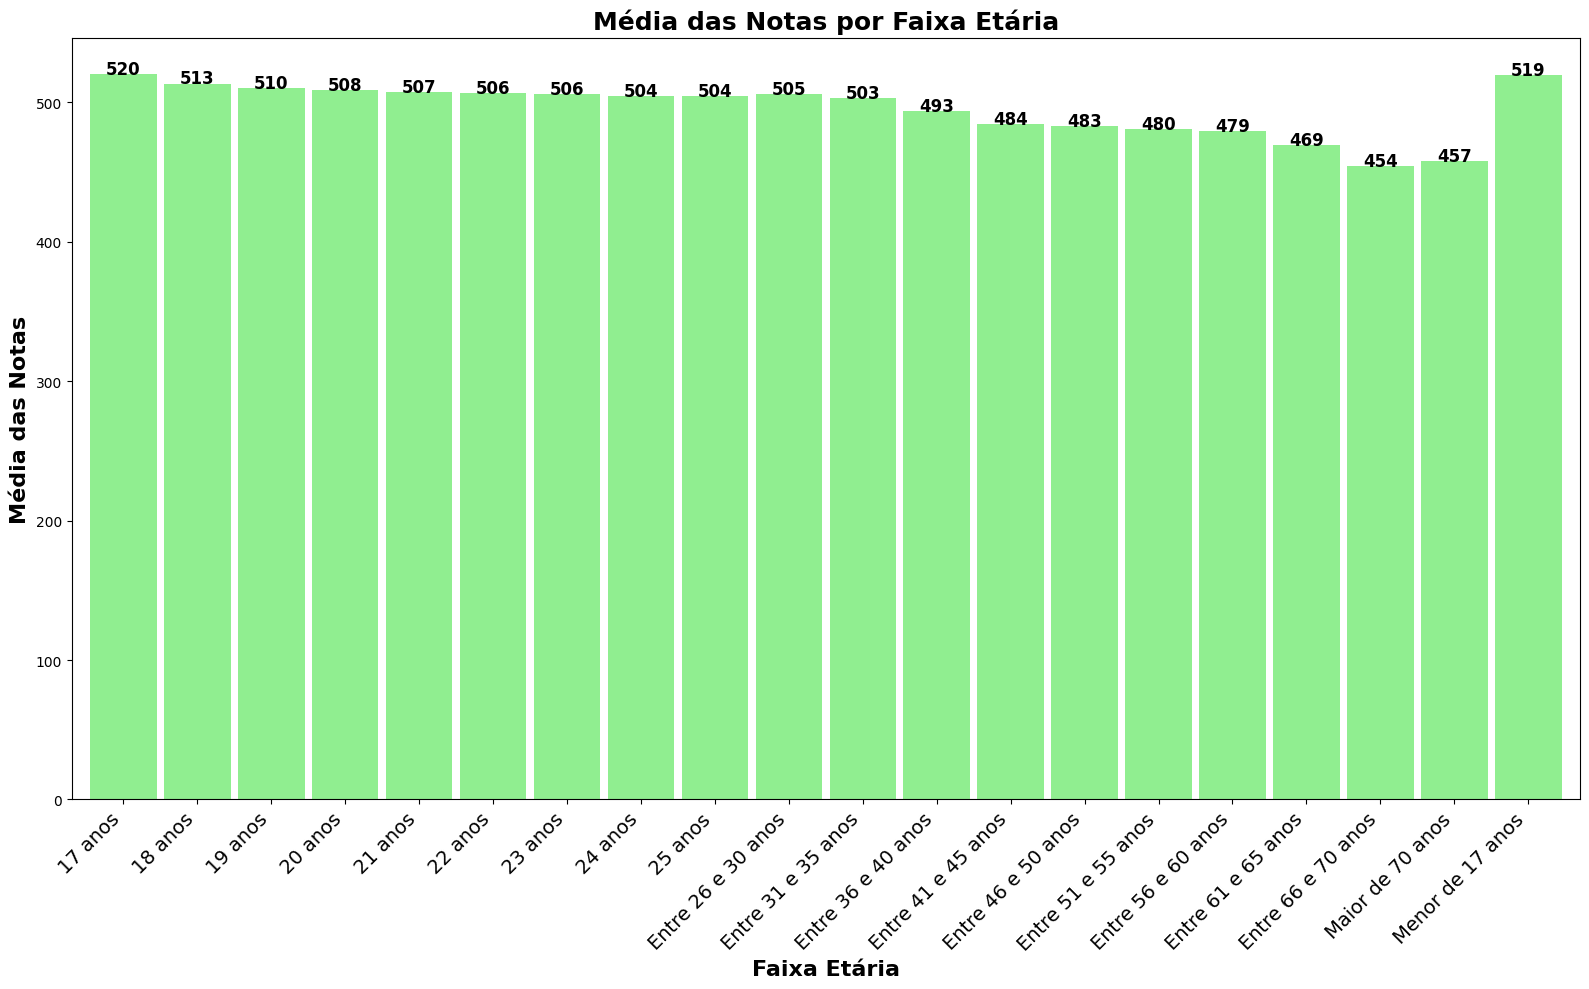

In [75]:
# Plotando o gráfico de barras
plt.figure(figsize=(16, 10))  

ax = media_por_faixa_etaria.plot(kind='bar', color='lightgreen', width=0.9) 

plt.xlabel('Faixa Etária', fontsize=16, fontweight='bold')
plt.ylabel('Média das Notas', fontsize=16, fontweight='bold')
plt.title('Média das Notas por Faixa Etária', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1, f'{int(p.get_height())}', 
            ha='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

#### 10 - Quantos Alunos Fizeram presença em todas as provas?

In [76]:
# Contabilizar as presenças (Sim = 1, Não = 0)
dataset['presencas'] = dataset[['PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC', 'PRESENCA_MT']].applymap(lambda x: 1 if x == 'Sim' else 0).sum(axis=1)
presenca_count = dataset['presencas'].value_counts()

print("Número de alunos que fizeram presença em:")
print(f"Todas as provas: {presenca_count.get(4, 0)} alunos")
print(f"3 provas: {presenca_count.get(3, 0)} alunos")
print(f"2 provas: {presenca_count.get(2, 0)} alunos")
print(f"1 prova: {presenca_count.get(1, 0)} alunos")
print(f"Nenhuma prova: {presenca_count.get(0, 0)} alunos")

Número de alunos que fizeram presença em:
Todas as provas: 2588681 alunos
3 provas: 0 alunos
2 provas: 174218 alunos
1 prova: 0 alunos
Nenhuma prova: 3020210 alunos


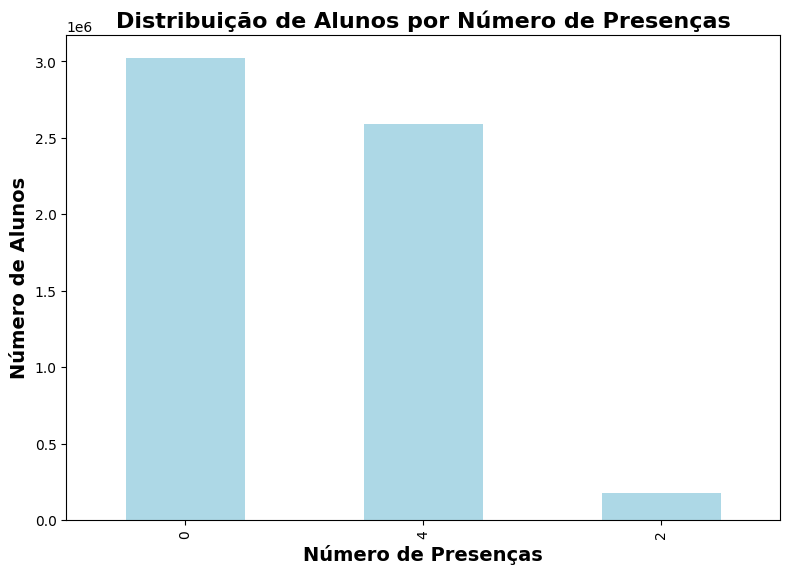

In [77]:
# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))

presenca_count.plot(kind='bar', color='lightblue')

plt.xlabel('Número de Presenças', fontsize=14, fontweight='bold')
plt.ylabel('Número de Alunos', fontsize=14, fontweight='bold')
plt.title('Distribuição de Alunos por Número de Presenças', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 11 - Alunos Ausentes por Faixa Etaria?

In [78]:
# Contabilizar as presenças (Sim = 1, Não = 0)
dataset['presencas'] = dataset[['PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC', 'PRESENCA_MT']].applymap(lambda x: 1 if x == 'Sim' else 0).sum(axis=1)
dataset['presenca'] = dataset['presencas'].apply(lambda x: 'Presente' if x > 0 else 'Ausente')

ausentes_por_faixa_etaria = dataset[dataset['presenca'] == 'Ausente'].groupby('FAIXA_ETARIA').size()

print("Número de alunos ausentes por Faixa Etária:")
print(ausentes_por_faixa_etaria)

Número de alunos ausentes por Faixa Etária:
FAIXA_ETARIA
17 anos               230352
18 anos               349276
19 anos               293902
20 anos               249315
21 anos               207136
22 anos               169496
23 anos               154108
24 anos               135431
25 anos               120446
Entre 26 e 30 anos    401238
Entre 31 e 35 anos    239948
Entre 36 e 40 anos    162509
Entre 41 e 45 anos     96998
Entre 46 e 50 anos     56482
Entre 51 e 55 anos     31073
Entre 56 e 60 anos     14676
Entre 61 e 65 anos      5296
Entre 66 e 70 anos      1783
Maior de 70 anos         627
Menor de 17 anos      100118
dtype: int64


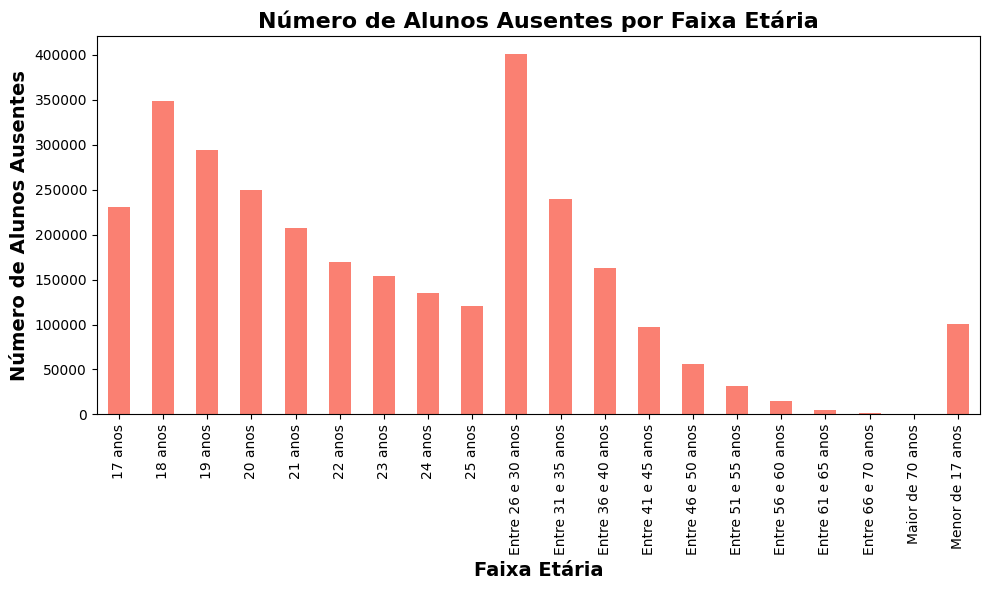

In [79]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
ausentes_por_faixa_etaria.plot(kind='bar', color='salmon')

plt.xlabel('Faixa Etária', fontsize=14, fontweight='bold')
plt.ylabel('Número de Alunos Ausentes', fontsize=14, fontweight='bold')
plt.title('Número de Alunos Ausentes por Faixa Etária', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 12 - Alunos Presentes por Faixa Etaria?

In [80]:
# Contabilizar as presenças (Sim = 1, Não = 0)
dataset['presencas'] = dataset[['PRESENCA_CN', 'PRESENCA_CH', 'PRESENCA_LC', 'PRESENCA_MT']].applymap(lambda x: 1 if x == 'Sim' else 0).sum(axis=1)
dataset['presenca'] = dataset['presencas'].apply(lambda x: 'Presente' if x > 0 else 'Ausente')

presentes_por_faixa_etaria = dataset[dataset['presenca'] == 'Presente'].groupby('FAIXA_ETARIA').size()

print("Número de alunos presentes por Faixa Etária:")
print(presentes_por_faixa_etaria)

Número de alunos presentes por Faixa Etária:
FAIXA_ETARIA
17 anos               545052
18 anos               538439
19 anos               315548
20 anos               210291
21 anos               146598
22 anos               105213
23 anos                85704
24 anos                69258
25 anos                56898
Entre 26 e 30 anos    174204
Entre 31 e 35 anos    101860
Entre 36 e 40 anos     72518
Entre 41 e 45 anos     46797
Entre 46 e 50 anos     29597
Entre 51 e 55 anos     16466
Entre 56 e 60 anos      7707
Entre 61 e 65 anos      2848
Entre 66 e 70 anos       910
Maior de 70 anos         304
Menor de 17 anos      236687
dtype: int64


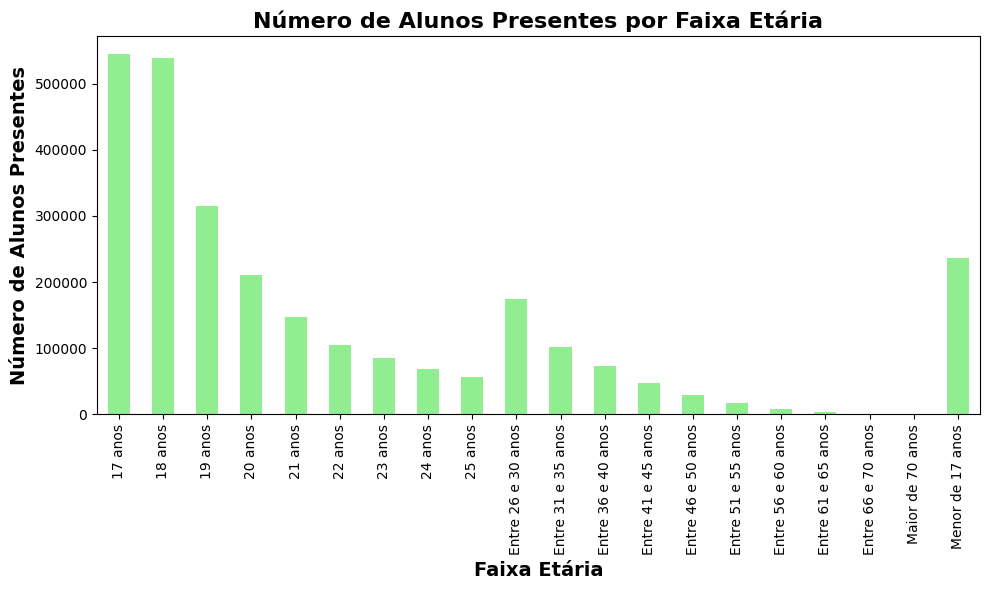

In [81]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
presentes_por_faixa_etaria.plot(kind='bar', color='lightgreen')

plt.xlabel('Faixa Etária', fontsize=14, fontweight='bold')
plt.ylabel('Número de Alunos Presentes', fontsize=14, fontweight='bold')
plt.title('Número de Alunos Presentes por Faixa Etária', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 13 - Relação entre Renda Familiar e Faixa Etária

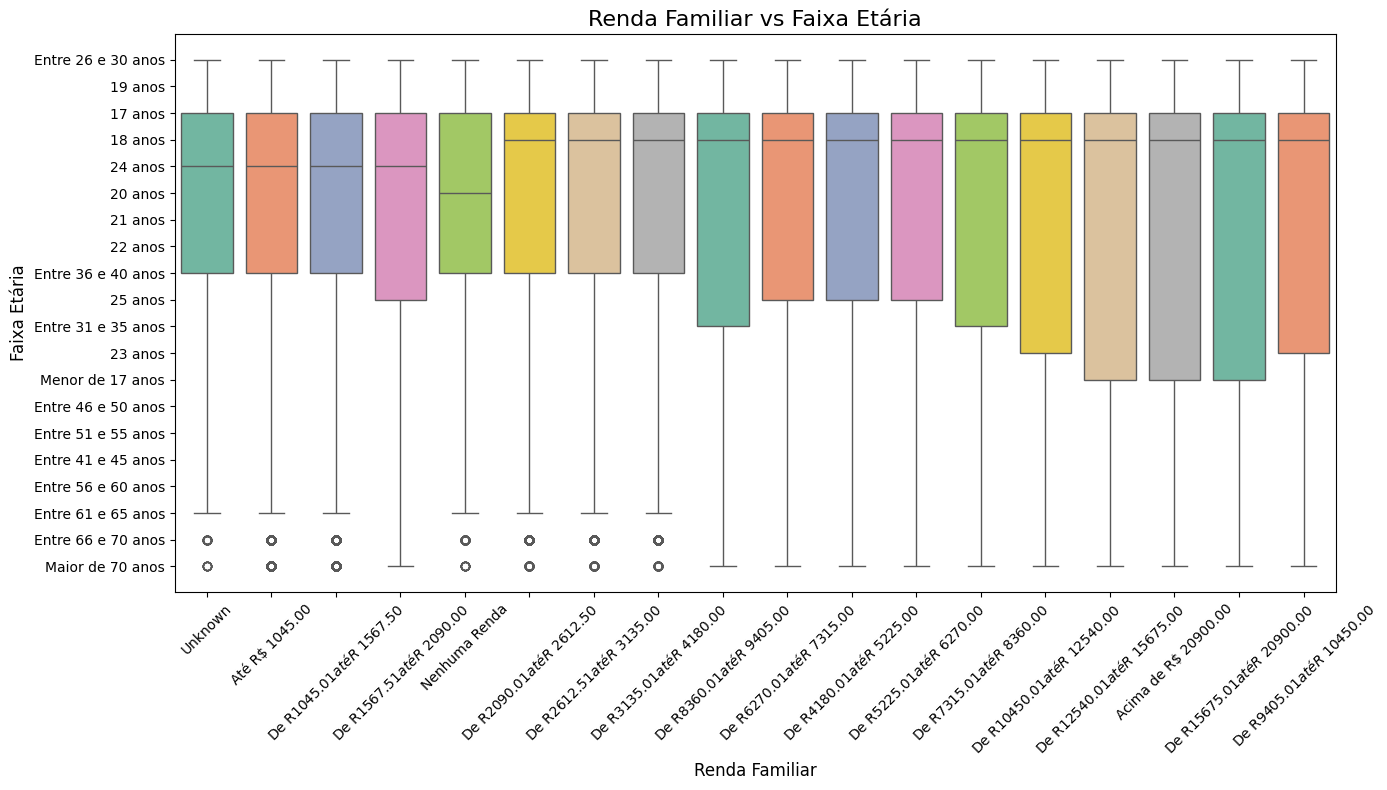

In [82]:
# Relacionando Renda Familiar e Faixa Etária
plt.figure(figsize=(14, 8))
sns.boxplot(x='Q006', y='FAIXA_ETARIA', data=dataset, palette="Set2")
plt.title('Renda Familiar vs Faixa Etária', fontsize=16)
plt.xlabel('Renda Familiar', fontsize=12)
plt.ylabel('Faixa Etária', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 14 - Quantidade de Pessoas na Residência vs Média das Notas

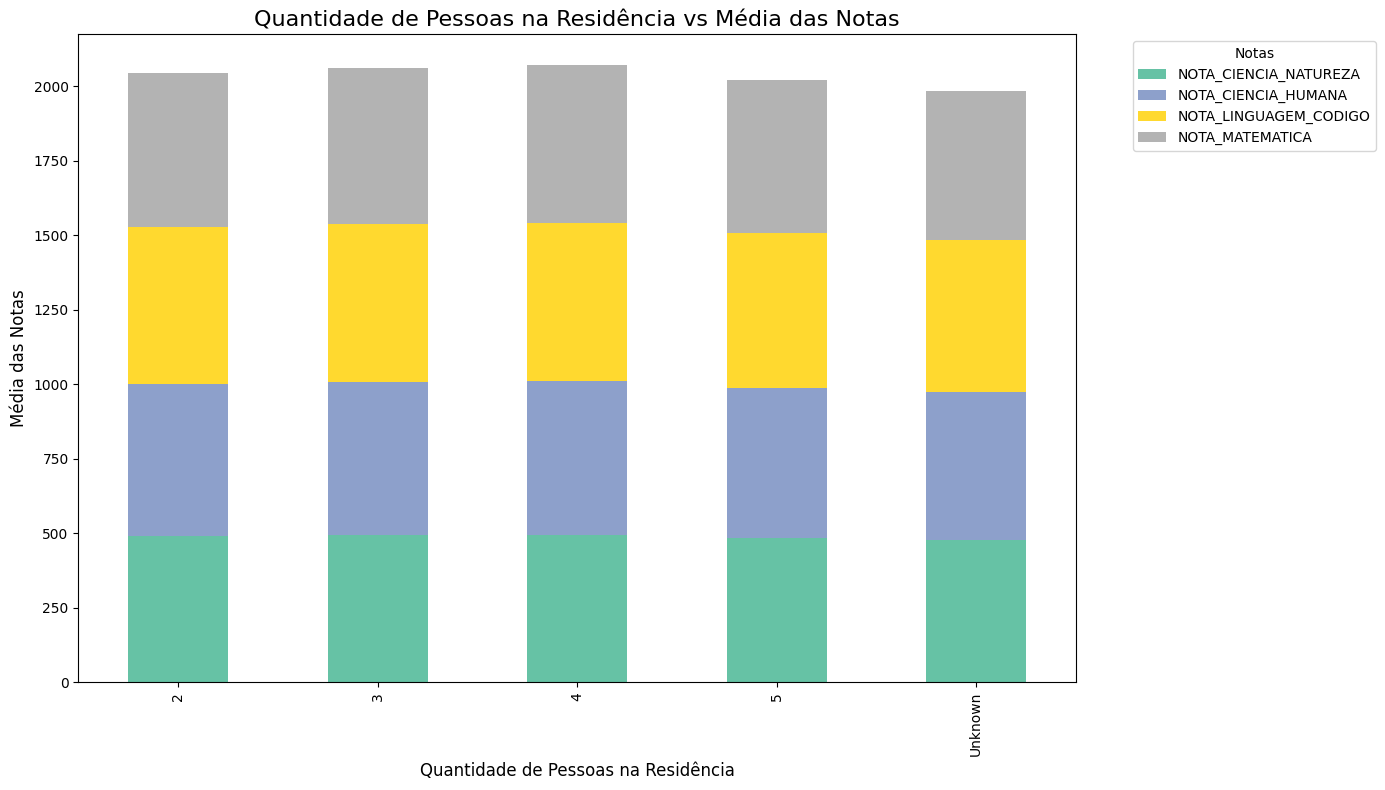

In [83]:
# Calculando as médias das notas por quantidade de pessoas na residência
df_media_notas = dataset.groupby('Q005')[['NOTA_CIENCIA_NATUREZA', 'NOTA_CIENCIA_HUMANA', 'NOTA_LINGUAGEM_CODIGO', 'NOTA_MATEMATICA']].mean()

df_media_notas.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Quantidade de Pessoas na Residência vs Média das Notas', fontsize=16)
plt.xlabel('Quantidade de Pessoas na Residência', fontsize=12)
plt.ylabel('Média das Notas', fontsize=12)
plt.legend(title='Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 15 - Escolaridade do Pai Responsável vs Média das Notas

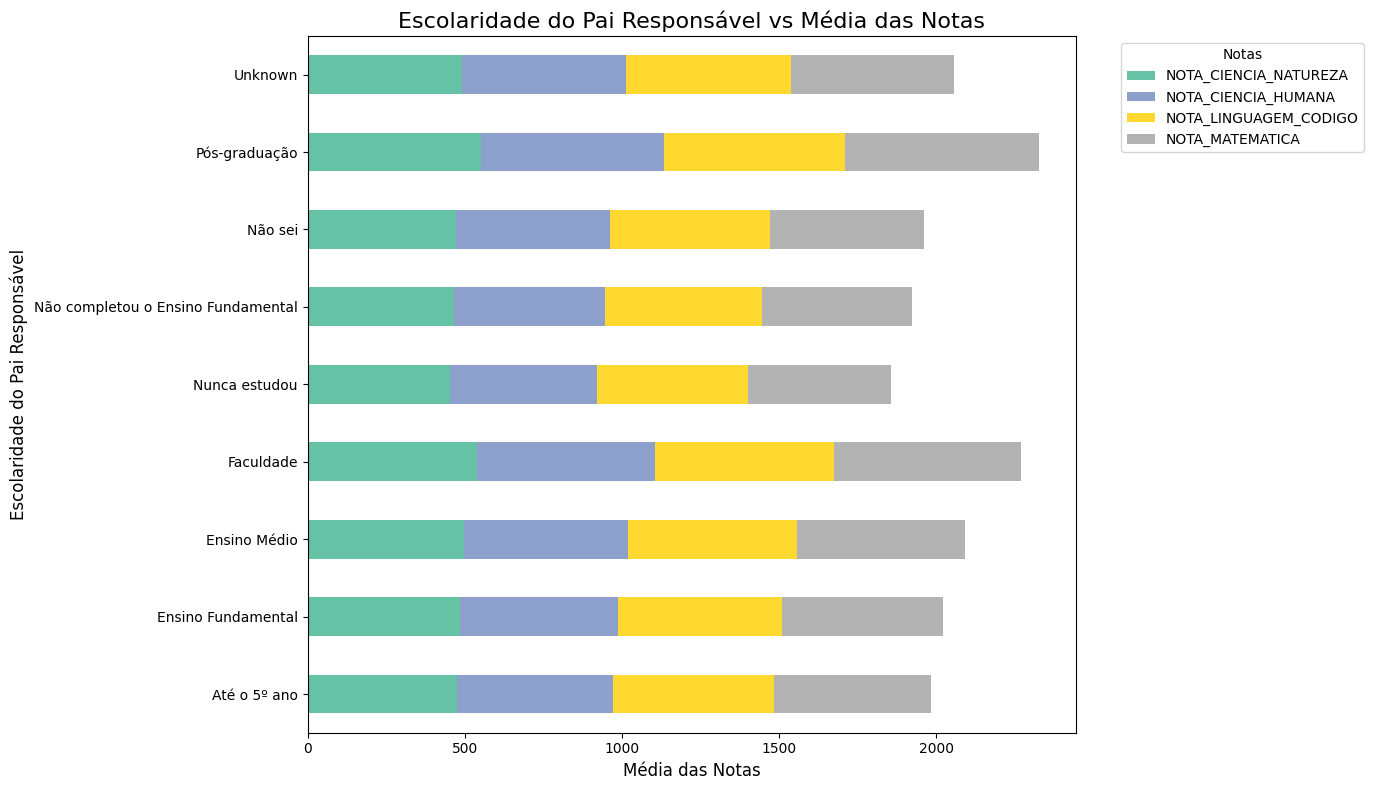

In [84]:
# Dicionário para as categorias de escolaridade
escolaridade_dict = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano',
    'C': 'Completou 4ª série/5º ano, não completou 8ª série/9º ano',
    'D': 'Completou 8ª série/9º ano, não completou Ensino Médio',
    'E': 'Completou Ensino Médio, não completou Faculdade',
    'F': 'Completou Faculdade, não completou Pós-graduação',
    'G': 'Completou Pós-graduação',
    'H': 'Não sei'
}

# Substituir as categorias de escolaridade do Pai Responsável pelas descrições
df_media_pai = dataset.groupby('Q001')[['NOTA_CIENCIA_NATUREZA', 'NOTA_CIENCIA_HUMANA', 'NOTA_LINGUAGEM_CODIGO', 'NOTA_MATEMATICA']].mean()
ax = df_media_pai.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='Set2')

# Ajustando o título e os rótulos
plt.title('Escolaridade do Pai Responsável vs Média das Notas', fontsize=16)
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('Escolaridade do Pai Responsável', fontsize=12)

# Atualizando as categorias de escolaridade no eixo Y com o dicionário
ax.set_yticklabels([escolaridade_dict.get(x, x) for x in df_media_pai.index])

# Adicionando a legenda
plt.legend(title='Notas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()


### 16 -  Média Por Acesso a Internet

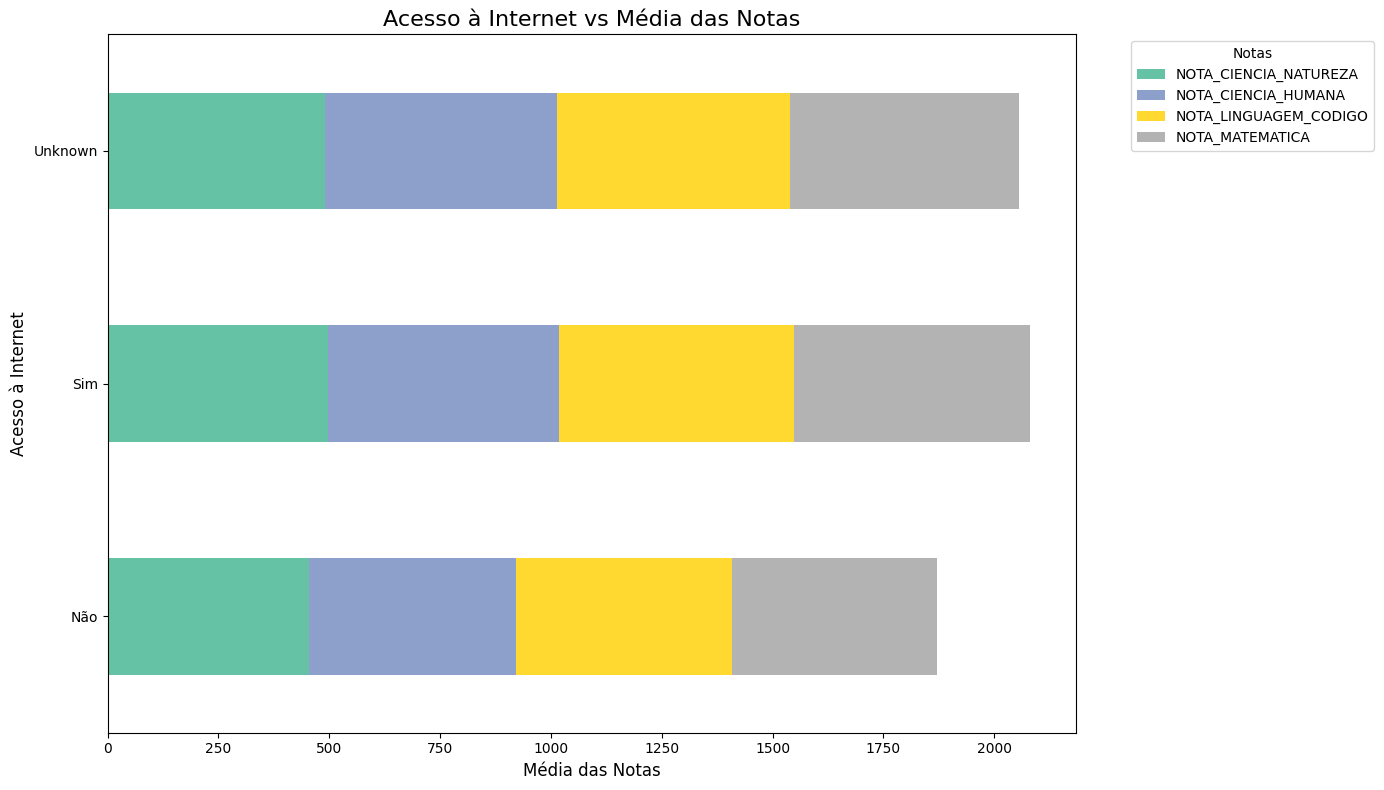

In [85]:
df_media_internet = dataset.groupby('Q025')[['NOTA_CIENCIA_NATUREZA', 'NOTA_CIENCIA_HUMANA', 'NOTA_LINGUAGEM_CODIGO', 'NOTA_MATEMATICA']].mean()

# Plotando as médias das notas com acesso à internet no eixo Y
ax = df_media_internet.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='Set2')

plt.title('Acesso à Internet vs Média das Notas', fontsize=16)
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('Acesso à Internet', fontsize=12)

acesso_dict = {
    1: 'Sim',  
    2: 'Não',  
}

ax.set_yticklabels([acesso_dict.get(x, str(x)) for x in df_media_internet.index])

# Adicionando a legenda
plt.legend(title='Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [86]:
caminho = r'C:\Users\licid\OneDrive\Documentos\Case\docker_mysql\deploy\enem_data\enem_data.csv'
dataset.to_csv(caminho, index=False)

# Conclusão  
Para garantir a qualidade e a exatidão dos dados, decidi retirar os outliers, para evitar que alterassem os resultados da análise.  

O Enem de 2020 passou por várias mudanças por causa da pandemia de COVID-19, o que afetou diretamente a participação dos candidatos. Além do adiamento do exame, houve mudanças no formato, incluindo a introdução da versão digital do teste. Essas adaptações podem ter impactado a adesão dos candidatos, já que nem todos estavam prontos para as novas condições, especialmente aqueles sem experiência com o formato digital.  

A taxa de abstenção de 51% é um reflexo dos problemas impostos pela crise sanitária, com muitos candidatos enfrentando dificuldades não apenas pela pandemia, mas também pelas mudanças no formato do exame e pelas questões logísticas relacionadas, como o acesso aos locais de provas e as exigências tecnológicas para os que escolheram a versão digital.  

O perfil dos ausentes também revelou que a faixa etária de 26 a 30 anos foi a mais afetada, possivelmente por questões de saúde, comorbidade, já que poderia estar mais exposta a complicações sérias causadas pela COVID-19. A análise também indicou que alguns candidatos participaram apenas de duas provas, o que reflete as dificuldades extras enfrentadas por muitos estudantes.  

Sobre o desempenho, as escolas privadas apresentaram as melhores médias, enquanto os alunos mais jovens, especialmente os com até 17 anos, se destacaram nas faixas etárias com melhores notas. Também foi notável que muitos participantes eram solteiros e brasileiros, com uma parte significativa sem renda familiar registrada, o que pode ajudar a entender a presença de alguns candidatos no exame, mesmo até maiores de 30 anos. 

A análise também mostrou que mais de 30% não tinha acesso à internet!

Embora o número de pessoas nas casas dos candidatos não tenha mostrado um impacto significativo no desempenho, a análise revelou que os alunos cujos responsáveis não haviam estudado apresentaram as notas mais baixas, indicando uma forte relação entre fatores socioeconômicos e o desempenho escolar.  
